#### The performance and operation of Ludwig depends on your system so let's start by displaying the OS details

In [1]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.2 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.2 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


#### trial.dominodatalab.com does not offer GPUs, but you can take this code and use it in standard Domino or in another system that does have GPU support

#### If an NVIDIA driver is installed, the following will show your driver details

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


#### If you have GPUs and an NVIDIA driver, the following will check to see if they are communicating correctly

In [3]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



#### We added `ludwig` to the requirements.txt file so it installed when Domino spun up this docker environment

#### The following command kicks off an experiment which combines training and test into a single handy step

#### Kicking off experiments via command line syntax is currently the recommended approach

#### The YAML file has been modified to stop after 3 epochs. The recommended value is 99. Ludwig experiments will use validation testing to determine the optimal stopping point. This runs pretty fast with decent sized GPUs.

#### Ludwig saves the output to the directory you specify in the experiment call and names it experiment_run_# where `#` is iteratively increased based on what is already in the results folder. You can name each experiment to make it easier to follow.

In [4]:
import ludwig
ludwig.__version__

'0.1.2'

In [5]:
!ludwig experiment --data_csv ../data/reuters-allcats.csv --model_definition_file ../model_definition.yaml \
--output_directory ../results --experiment_name ludwig_test --skip_save_progress


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

 _         _        _      
| |_  _ __| |_ __ _(_)__ _ 
| | || / _` \ V  V / / _` |
|_|\_,_\__,_|\_/\_/|_\__, |
                     |___/ 
ludwig v0.1.2 - Experiment

Experiment name: ludwig_test
Model name: run
Output path: ../results/ludwig_test_run_0


ludwig_version: '0.1.2'
command: ('/usr/local/anaconda/bin/ludwig experiment --data_csv '
 '../data/reuters-allcats.csv --model_definition_file ../model_definition.yaml '
 '--output_directory ../results --experiment_name ludwig_test '
 '--skip_save_progress')
random_seed: 42
input_data: '../data/reuters-allcats.csv'
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'encoder': 'parallel_cnn',
                              'level': 'word',
                              '

Instructions for updating:
Use tf.cast instead.
From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:102: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

╒══════════╕
│ TRAINING │
╘══════════╛

2019-08-14 19:59:59.556457: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2019-08-14 19:59:59.561329: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2500000000 Hz
2019-08-14 19:59:59.56215

#### Visualizing learning curves is easy to do with the Python API

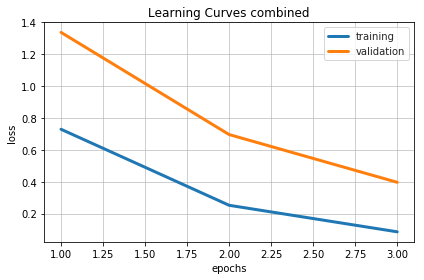

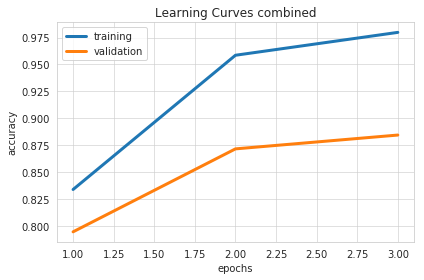

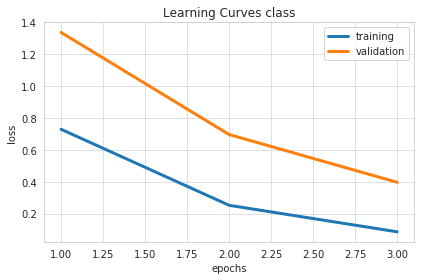

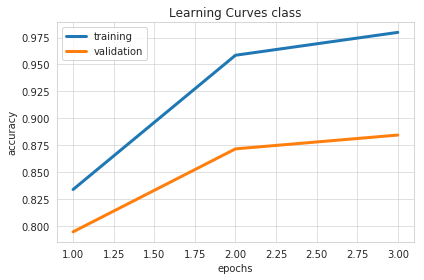

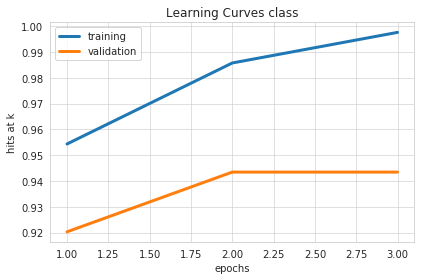

In [6]:
%matplotlib inline
from ludwig import visualize
visualize.learning_curves(['../results/ludwig_test_run_0/training_statistics.json'],None)

#### There are other features in the Python API

#### This example builds a Ludwig Model which can then be trained and tested with API calls

In [1]:
from ludwig.api import LudwigModel
ludwig_model = LudwigModel(model_definition = {...}, model_definition_file="../model_definition.yaml")

/usr/local/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



#### Feel free to experiement with this model noting that without GPUs some of these commands will take several minutes to complete as I didn't see an option to limit the number of epochs

In [8]:
train_stats = ludwig_model.train(data_csv="../data/reuters-allcats.csv", output_directory="../results")

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [9]:
train_stats

{'train': OrderedDict([('class',
               OrderedDict([('loss',
                             [1.0571700392740375,
                              0.7987502229762377,
                              0.7632436938531895]),
                            ('accuracy',
                             [0.6593444909344491,
                              0.7053695955369595,
                              0.7039748953974896]),
                            ('hits_at_k',
                             [0.7873082287308228,
                              0.8859832635983264,
                              0.8828451882845189])])),
              ('combined',
               {'loss': [1.0571700392740375,
                 0.7987502229762377,
                 0.7632436938531895],
                'accuracy': [0.6593444909344491,
                 0.7053695955369595,
                 0.7039748953974896]})]),
 'validation': OrderedDict([('class',
               OrderedDict([('loss',
                             [1.257483

In [10]:
test_out = ludwig_model.test(data_csv="../data/reuters-allcats.csv")

Instructions for updating:
Use standard file APIs to check for files with this prefix.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from results/api_experiment_run_0/model/model_weights_progress


INFO:tensorflow:Restoring parameters from results/api_experiment_run_0/model/model_weights_progress
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
test_out

(     class_predictions  class_probabilities_<UNK>  class_probabilities_Neg-  \
 0                 Neg-               6.756611e-12                  0.965754   
 1                 Neg-               1.674098e-10                  0.903037   
 2                 Neg-               3.981540e-10                  0.930640   
 3                 Neg-               9.602507e-10                  0.961586   
 4                 Neg-               2.402264e-10                  0.958219   
 5                 Neg-               2.249697e-10                  0.861255   
 6                 Neg-               6.777026e-11                  0.933110   
 7                 Neg-               1.196682e-08                  0.942531   
 8                 Neg-               1.509458e-10                  0.895136   
 9                 Neg-               1.238888e-10                  0.870179   
 10                Neg-               1.331046e-11                  0.938519   
 11                Neg-               3.